In [8]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

    - intro
    - rules
    - trig
    - implicit diff
    - related rates
    - l'hopital
    - concavity/inflection

## Derivatives

Imagine you drove a car for 30 minutes at an average speed of 60 mph. Over that 30 minutes, you probably weren't going exactly 60 mph. More likely, you started the car and its speed increased over time to 75 mph. Then you hit some traffic and slowed down for a bit, and so on. What if you want to know how your speed was changing precisely at an instant? How much was your speed slowing down or speeding up at exactly the 5 minute mark? This is an example of **instantaneous rate of change** and it's where derivatives come into play in Calculus. 

### Tangent Lines: Understanding Instantaneous Rates of Change

Consider a curve on a graph representing a function, say $f(x) = x^2$. The derivative at a specific point on this curve tells us the slope of the tangent line at that point (The tangent line is a straight line that just touches the curve at a specific point, without crossing through it). This tangent line represents the aforementioned **instantaneous rate of change** of the function at that exact spot.

When determining a slope, one traditionally needs two points on a plane to calculate $\frac{y_1-y_2}{x_1 - x_2} = \frac{\Delta y}{\Delta x}$. How can this be expressed to find the slope at an exact point? This is where limits come in handy! We have this notation for a function's derivative, which is very similar to $\frac{\Delta y}{\Delta x}$: 

$\lim_{{h \to 0}} \frac{f(x+h)-f(x)}{x+h-x}$ = $\lim_{{h \to 0}} \frac{f(x+h)-f(x)}{h}$

Breaking the above down, it's calculating the slope between 2 points, but as h gets closer to 0, those two points get closer and closer together, until the slope is virtually at a single point. $f(x+h)=y_1$, $f(x)=y_2$, $x+h = x_1$, and $x=x_2$. $x+h-x$ in the denominator simplifies to just $h$.

To find the instantaneous slope at any given point, let's use the above derivative function to find the derivative of $f(x) = x^2$:

$\lim_{{h \to 0}} \frac{f(x+h)-f(x)}{h} = \lim_{{h \to 0}} \frac{(x+h)^2 -x^2}{h}$ (plugging $x^2$ in for $f(x)$)

$\lim_{{h \to 0}} \frac{(x+h)^2 -x^2}{h} = \lim_{{h \to 0}} \frac{x^2+2xh+h^2-x^2}{h}$

$\lim_{{h \to 0}} \frac{x^2+2xh+h^2-x^2}{h} = \lim_{{h \to 0}} \frac{h(2x+h)}{h}$

$\lim_{{h \to 0}} \frac{h(2x+h)}{h} = \lim_{{h \to 0}} 2x+h$

$\lim_{{h \to 0}} 2x+h = 2x$

$\frac{d}{dx}f(x) = \frac{d}{dx}x^2 = f'(x) = 2x$

Below we can solve programattically to check the derivative is correct:

In [38]:
# Define the variable and the function
x = smp.symbols('x')
f = x**2

# Define the limit definition of derivative
h = smp.symbols('h')
difference_quotient = (f.subs(x, x + h) - f) / h

# Calculate the derivative using the limit definition
derivative = smp.limit(difference_quotient, h, 0)

# Resulting derivative
derivative

2*x

Now, when plugging numbers into $f'(x)$, we are getting the slope or rate of change at that specific point! Refer to the below graph of $x^2$ for an example:

If you pick two $x$ values from the curve, say $2$ and $-1$, the derivatives at those points are $f'(2) = 2*2 = 4$ and $f'(-1) = 2*-1 = -2$. This means that precisely at $x = 2$, the function's output is changing at a rate of $4$ units for every $1$ unit change in $x$ and at $x = -1$, the function's output is changing at a rate of $-2$ units for every $1$ unit change in $x$:

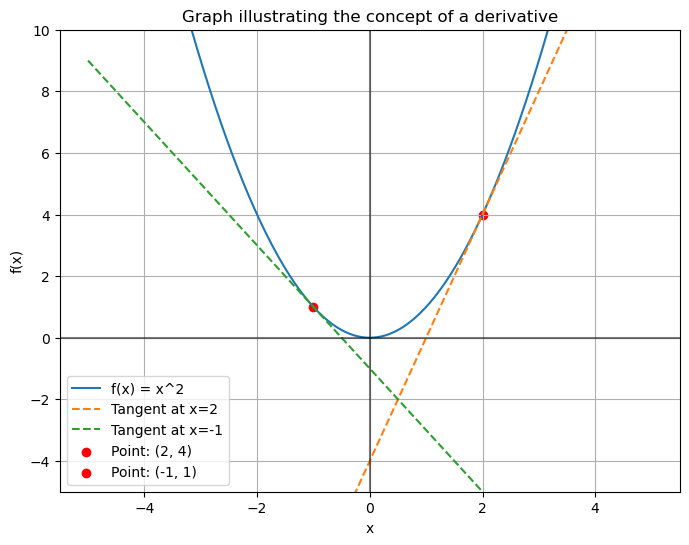

In [40]:
# Define the function
def f(x):
    return x**2

# Define the derivative of the function
def f_derivative(x):
    return 2*x

# Define points where we want to visualize the derivative
x_point1 = 2
y_point1 = f(x_point1)
x_point2 = -1
y_point2 = f(x_point2)

# Define the tangent lines (derivative at x_points)
tangent_slope1 = f_derivative(x_point1)
tangent_intercept1 = y_point1 - tangent_slope1 * x_point1
tangent_slope2 = f_derivative(x_point2)
tangent_intercept2 = y_point2 - tangent_slope2 * x_point2

# Generate x values for plotting
x = np.linspace(-5, 5, 400)
y = f(x)

# Generate tangent line values for plotting
tangent_line1 = tangent_slope1 * x + tangent_intercept1
tangent_line2 = tangent_slope2 * x + tangent_intercept2

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^2')
plt.plot(x, tangent_line1, label=f'Tangent at x={x_point1}', linestyle='--')
plt.plot(x, tangent_line2, label=f'Tangent at x={x_point2}', linestyle='--')
plt.scatter(x_point1, y_point1, color='red', label=f'Point: ({x_point1}, {y_point1})')
plt.scatter(x_point2, y_point2, color='red', label=f'Point: ({x_point2}, {y_point2})')
plt.axhline(y=0, alpha=0.5, color='black')
plt.axvline(x=0, alpha=0.5, color='black')
plt.ylim(top=10, bottom=-5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph illustrating the concept of a derivative')
plt.legend()
plt.grid(True)
plt.show()